## Human ectoparasite model

#### Import packages

In [96]:
!pip install pymc
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
from pymc.Matplot import plot
import scipy.stats

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


#### Import observed data

In [97]:
barcelona_1490 = np.array([1,0,1,1,0,1,5,3,1,0,1,1,2,3,5,0,6,3,6,3,8,1,5,2,1,1,2,2,2,5,7,12,4,3,5,3,8,5,8,8,6,12,11,22,15,14,24,14,15,20,20,13,11,25,28,30,24,28,42,24,32,24,27,31,34,33,29,31,38,40,42,38,53,44,66,52,53,56,63,49,60,57,65,55,55,47,67,62,65,57,47,46,62,54,52,48,49,64,46,67,52,50,56,46,41,38,36,39,31,32,41,25,32,35,36,36,33,26,42,31,19,27,23,22,15,24,32,19,10,16,12,15,14,13,12,13,12,6,12,15,5,9,3,5,12,6,7,3,3,3,3,2,3,3,0,3,2,3,3,1,1,4,2,3,0,2,3,2,0,1,1,4,1,2,2,1,1,2,0,1,1,2])
barcelona_pop = 25000.0

malta_1813 = np.array([1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 2, 8, 10, 6, 6, 4, 7, 4, 5, 5, 7, 16, 10, 12, 18, 8, 13, 19, 16, 24, 19, 28, 24, 32, 27, 33, 33, 36, 19, 19, 23, 28, 21, 18, 24, 32, 29, 33, 23, 34, 39, 37, 44, 47, 53, 42, 44, 53, 43, 49, 56, 55, 51, 52, 56, 63, 59, 55, 65, 67, 36, 50, 41, 43, 41, 55, 48, 45, 44, 53, 47, 64, 49, 53, 63, 58, 50, 48, 27, 47, 43, 35, 37, 24, 26, 28, 26, 31, 31, 29, 34, 28, 32, 38, 27, 32, 32, 34, 33, 34, 31, 38, 27, 25, 29, 28, 26, 37, 33, 32, 28, 34, 34, 38, 29, 30, 24, 20, 23, 17, 17, 30, 23, 12, 20, 24, 21, 12, 12, 16, 11, 11, 19, 12, 15, 14, 16, 12, 16, 15, 7, 6, 14, 13, 9, 8, 5, 3, 5, 4, 3, 5, 5, 5, 4, 7, 10, 2, 4, 7, 6, 2, 3, 5, 1, 5, 3, 1, 1, 3, 2, 3, 3, 1, 3, 0, 2, 0, 2, 2, 2, 1, 1, 3, 4, 2, 4, 1, 2, 1, 2, 1, 4, 1, 1])
malta_pop = 97000.0

florence_1400 = np.array([8, 19, 9, 7, 12, 10, 5, 16, 11, 16, 19, 22, 18, 16, 29, 30, 28, 29, 30, 28, 28, 28, 32, 38, 28, 46, 44, 44, 49, 49, 47, 52, 44, 44, 39, 57, 62, 67, 70, 64, 91, 87, 102, 103, 74, 81, 77, 73, 70, 82, 109, 98, 106, 104, 141, 147, 150, 161, 200, 161, 153, 147, 150, 173, 170, 204, 189, 176, 180, 180, 169, 137, 155, 170, 138, 136, 129, 152, 135, 118, 158, 125, 148, 153, 134, 126, 108, 121, 124, 101, 113, 70, 73, 73, 63, 76, 51, 84, 65, 76, 57, 55, 44, 47, 44, 32, 36, 27, 35, 37, 29, 35, 38, 36, 20, 51, 30, 42, 29, 27, 27, 23, 34, 22, 12, 21, 28, 18, 12, 18, 18, 21, 14, 28, 23, 20, 16, 15, 17, 23, 15, 13, 15, 8, 15, 12, 22, 5, 11, 8, 7, 13, 5, 10, 6, 12, 4, 13, 11, 10, 3, 5, 11, 5, 7, 5, 6, 3, 11, 5, 5, 11, 6, 5, 8, 6, 6, 6, 5, 6])
florence_pop = 60000.0

cairo_1835 = np.array([34, 24, 23, 18, 21, 16, 17, 26, 12, 17, 21, 25, 25, 17, 23, 20, 9, 19, 20, 19, 18, 28, 31, 16, 20, 29, 21, 14, 18, 26, 19, 32, 27, 30, 27, 33, 20, 26, 29, 26, 32, 20, 25, 27, 30, 23, 21, 22, 24, 29, 41, 41, 45, 39, 40, 34, 51, 47, 48, 57, 47, 55, 50, 63, 53, 54, 55, 55, 66, 44, 61, 49, 71, 66, 55, 64, 76, 73, 68, 82, 73, 84, 86, 66, 78, 89, 89, 92, 112, 83, 114, 140, 136, 126, 121, 112, 105, 122, 128, 104, 87, 95, 88, 91, 79, 90, 78, 96, 82, 84, 95, 86, 100, 100, 79, 71, 79, 64, 73, 62, 78, 68, 55, 60, 69, 75, 59, 62, 59, 55, 62, 49, 46, 39, 34, 27, 29, 30, 30, 16, 11, 21, 18, 18, 20, 11, 14, 21, 17, 13, 13, 17, 13, 20, 21, 10, 11, 10, 15, 15, 8, 5, 7, 6, 14, 4, 10, 6, 7, 10, 4, 13, 11, 9, 6, 10, 4, 6, 14, 3, 3, 3, 0, 1, 5, 19, 26, 17, 21, 20, 23, 18, 34, 19, 23, 17, 28, 23, 33, 19, 34, 17, 19, 21, 26, 14, 24, 20, 25, 15, 20, 27, 19, 20, 19, 19, 30, 26, 34, 23, 25, 25, 22, 18, 32, 27, 29, 31, 43, 34, 37, 31, 29, 32, 34, 29, 49, 28, 52, 36, 44, 29, 34, 44, 51, 55, 48, 68, 58, 61, 73, 48, 65, 47, 69, 55, 78, 73, 91, 78, 96, 79, 128, 114, 127, 123, 153, 130, 151, 181, 179, 207, 214, 234, 179, 291, 312, 337, 357, 371, 394, 421, 407, 461, 460, 550, 545, 560, 579, 621, 596, 596, 662, 697, 746, 668, 722, 695, 760, 731, 760, 660, 748, 659, 717, 717, 753, 680, 653, 648, 638, 535, 575, 472, 437, 391, 364, 266, 344, 286, 270, 240, 237, 233, 192, 227, 168, 158, 169, 135, 107, 119, 92, 89, 92, 78, 66, 66, 55, 41, 49, 73, 45, 47, 46, 41, 44, 34, 47, 30, 40, 43, 42, 34, 28, 38, 33, 27, 20, 34, 34, 26, 34, 26, 22, 20])
cairo_pop = 263700.0

eyam_1665 = np.array([1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 4, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 4, 2, 2, 1, 2, 1, 1, 1, 2, 3, 6, 1, 3, 1, 3, 4, 1, 3, 5, 4, 2, 6, 6, 3, 3, 4, 1, 1, 2, 1, 2, 8, 3, 5, 1, 3, 4, 2, 4, 2, 1, 1, 1, 3, 2, 1, 4, 2, 1, 1, 2, 2, 1, 3, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1])
eyam_pop = 700.0

prague_1713 = np.array([45, 62, 99, 117, 77, 59, 119, 106, 123, 111, 159, 106, 164, 143, 150, 160, 163, 129, 194, 171, 202, 155, 226, 241, 207, 198, 186, 286, 364, 198, 236, 243, 225, 228, 281, 246, 263, 247, 200, 154, 164, 134, 113, 99, 113, 136, 130, 126, 122, 142, 117, 90, 81, 82, 84, 104, 82, 74, 74, 64, 73, 81, 63, 67, 74, 82, 71, 59, 49, 48, 57, 43, 53, 72, 64, 48, 32, 42, 32, 27, 23, 26, 36, 35, 33, 24, 23, 17, 23, 12, 20, 19, 14, 12, 24, 19, 9, 17, 16, 21, 7, 13, 9, 21, 7, 10, 10, 8, 9, 10, 9, 6, 9, 7, 10, 4, 5, 11, 4, 6, 11, 9, 8, 9, 5, 7, 5, 10, 6, 3, 2, 7, 4, 1, 8, 1, 1, 3, 8, 6, 5, 3, 2, 4, 3, 7, 6, 4, 2, 5, 1, 1, 4, 2, 2, 2, 3, 3, 2, 2, 5, 1, 2, 3, 1, 2, 2, 2, 0, 0, 0, 1, 3, 0, 2, 0, 1, 0, 0, 0, 0, 1, 3, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1])
prague_pop = 30000.0

london_1563 = np.array([17, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 25, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 23, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 44, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 64, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 131, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 174, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 289, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 299, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 542, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 608, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 976, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 963, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 1454, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 1626, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 1372, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 1828, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 1262, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 829, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 1000, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 905, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 380, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 283, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 506, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 281, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 178, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 249, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 239, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 134, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 121, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 45, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 26, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 13])
london_pop = 85000.0

givry_1348 = np.array([2, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 1, 1, np.NaN, np.NaN, np.NaN, 2, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 3, 2, np.NaN, np.NaN, np.NaN, 4, 4, 1, np.NaN, 2, 1, 7, 5, 3, 1, 1, 4, 5, 3, 3, 4, 1, 5, 2, 4, 3, 6, 2, 2, 6, 3, 8, 4, 6, 10, 6, 9, 8, 8, 4, 6, 15, 3, 11, 24, 7, 10, 15, 10, 14, 11, 17, 8, 6, 3, 17, 6, 11, 16, 7, 16, 12, 5, 10, 7, 7, 6, 7, 7, 8, 7, 6, 6, 9, 4, 7, 9, 3, 14, 5, 5, 4, 8, 6, 7, 3, 2, 5, 4, 4, 2, 3, 1, 3, np.NaN, 6, 3, 4, 3, 4, np.NaN, 2, 1, np.NaN, 4, 3, 2, 1, np.NaN, np.NaN, 5, np.NaN, np.NaN, np.NaN, 3])
givry_pop = 3000.0

mortality_data = florence_1400
pop_size = florence_pop
t = len(mortality_data)

#### Set up the model

In [98]:
__all__ = ['mortality_data', 'beta_1','beta_2','beta_h', 'gamma', 'sigma', 'mu', 'lice_index', 
           'E_0', 'I_0', 'R_0', 'D_0', 'D_h',
           'pop_size', 'sus_frac',
           'mortality', 'mortality_sim']

#Parameters
beta_1 = pm.Uniform('beta_1', 1e-9, .05)
beta_2 = pm.Uniform('beta_2', 1e-9, 1.)
beta_h = 0.05
sigma = 1/8.
gamma = 1/2.
mu = .6
lice_index = 15.0
# pop_size = barcelona_pop
sus_frac = pm.Uniform('sus_frac', 1e-9, 1.)

#Initial conditions
S_0 = pop_size*sus_frac
I1_0 = pm.Uniform('I1_0', 1., 100.0)
I2_0 = 2.
R_0 = 0.
D_0 = 1.

#SIIRD + vector model for human ectoparasite plague
@pm.deterministic
def SIRD(S_0=S_0, I1_0=I1_0, I2_0=I2_0, R_0=R_0, D_0=D_0, 
         beta_1=beta_1, beta_2=beta_2, beta_h=beta_h, 
         gamma=gamma, sigma=sigma, lice_index=lice_index):
    S_h = np.zeros(t)
    I1_h = np.zeros(t)
    I2_h = np.zeros(t)
    R_h = np.zeros(t)
    D_h = np.zeros(t)
    
    S_v= np.zeros(t)
    I_v = np.zeros(t)
    
    S_h[0] = S_0
    I1_h[0] = I1_0
    I2_h[0] = I2_0
    R_h[0] = R_0
    D_h[0] = D_0
    
    S_v[0] = lice_index*(S_0+R_0)
    I_v[0] = lice_index*I1_0

    for i in range(1, t):
        N_h = S_h[i-1] + I1_h[i-1] + I2_h[i-1] + R_h[i-1]
        
        new_I1 = min(S_h[i-1], beta_h*S_h[i-1]*I_v[i-1]/N_h)
        new_I2_and_R = min(I1_h[i-1], sigma*I1_h[i-1])
        new_I2 = mu*new_I2_and_R
        new_recovered = new_I2_and_R - new_I2
        new_dead = min(I2_h[i-1], gamma*I2_h[i-1])

        S_h[i] = S_h[i-1] - new_I1
        I1_h[i] = I1_h[i-1] + new_I1 - new_I2_and_R
        I2_h[i] = I2_h[i-1] + new_I2 - new_dead
        R_h[i] = R_h[i-1] + new_recovered
        D_h[i] = new_dead

        lice_K = lice_index*N_h
        if (S_v[i-1]+I_v[i-1]/lice_K) < 1:
            lice_births = 0.111*S_v[i-1]*(1-(S_v[i-1]+I_v[i-1])/lice_K)
        elif (S_v[i-1]+I_v[i-1]/lice_K) > 1:
            lice_births = 0.

        new_I1_infected_lice = beta_1*S_v[i-1]*I1_h[i-1]/N_h
        new_I2_infected_lice = beta_2*S_v[i-1]*I2_h[i-1]/N_h
        new_removed_lice = 0.33*I_v[i-1]

        new_infected_lice = min(S_v[i-1],((beta_1*S_v[i-1]*I1_h[i-1]/N_h) + (beta_2*S_v[i-1]*I2_h[i-1]/N_h)))
        new_removed_lice = 0.33*I_v[i-1]

        S_v[i] = S_v[i-1] + lice_births - new_infected_lice
        I_v[i] = I_v[i-1] + new_infected_lice - new_removed_lice
        
    return S_h,I1_h,I2_h,R_h,D_h,S_v,I_v

D_h = pm.Lambda('D_h', lambda SIRD=SIRD: SIRD[4])

#Likelihood
mortality = pm.Poisson('mortality', mu=D_h, value=mortality_data, observed=True)
mortality_sim = pm.Poisson('mortality_sim', mu=D_h)

lonc#### Fit the model

In [99]:
if __name__ == '__main__':
    vars = [mortality_data, beta_1, beta_2, beta_h, sigma, mu, gamma, lice_index, 
            I1_0, I2_0, R_0, D_0, D_h,
            sus_frac,mortality, mortality_sim]
    
    mc = pm.MCMC(vars, db='pickle', dbname='ectoparasite')
    mc.use_step_method(pm.AdaptiveMetropolis, [beta_1, beta_2, sus_frac, I1_0])
    mc.sample(iter=180000, burn=80000, thin=10, verbose=0)
    mc.sample(iter=180000, burn=80000, thin=10, verbose=0)
    mc.sample(iter=180000, burn=80000, thin=10, verbose=0)
    mc.db.close()

 [-----------------100%-----------------] 180000 of 180000 complete in 266.7 sec

#### Output summary

In [100]:
pm.gelman_rubin(mc)

{'D_h': [nan,
  nan,
  1.0015182686089308,
  1.001514690267469,
  1.0014461321645975,
  1.0013393342664436,
  1.0012274093253462,
  1.0011337582795798,
  1.0010678880112827,
  1.0010287563480142,
  1.0010102433082313,
  1.0010051462767957,
  1.0010071837202565,
  1.0010116793929764,
  1.001015552536389,
  1.0010170062652493,
  1.0010151473699118,
  1.001009659332968,
  1.0010005695131656,
  1.0009881039278916,
  1.0009726047523702,
  1.0009544852765704,
  1.0009342039229605,
  1.000912246535444,
  1.000889111855433,
  1.0008652985072422,
  1.0008412934377449,
  1.00081756227589,
  1.000794542042708,
  1.000772636401498,
  1.000752213378691,
  1.0007336052887577,
  1.000717110481892,
  1.0007029964921097,
  1.0006915041767994,
  1.000682852486272,
  1.0006772435665494,
  1.0006748679678805,
  1.000675909797083,
  1.0006805517090585,
  1.0006889796797178,
  1.0007013875387307,
  1.0007179812667393,
  1.0007389830792928,
  1.0007646353300241,
  1.0007952042699388,
  1.000830983699159,
  1

In [101]:
mc.summary()


I1_0:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	98.921           0.972            0.034          [ 96.945 100.   ]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	96.327           98.508          99.162         99.651        99.975
	

beta_1:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.049            0.001            0.0                [0.046 0.05 ]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.045            0.048           0.049          0.05          0.05
	

mortality_sim:
 
	Mean             SD               MC Error        95% HPD interval
	-------------


D_h:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	1.0              0.0              0.0                      [1. 1.]
	1.0              0.0              0.0                      [1. 1.]
	4.21             0.036            0.001              [4.135 4.25 ]
	8.119            0.077            0.003              [7.962 8.204]
	11.32            0.109            0.004            [11.097 11.444]
	13.641           0.132            0.005            [13.374 13.795]
	15.297           0.148            0.005            [15.003 15.475]
	16.552           0.16             0.006            [16.234 16.751]
	17.605           0.169            0.006            [17.264 17.827]
	18.584           0.177            0.007            [18.215 18.815]
	19.559           0.185            0.007            [19.191 19.826]
	20.565           0.193            0.007            [20.163 20.837]
	21.616           0.201            0.008

In [102]:
M = pm.MAP(mc)
M.fit()
print("BIC:", M.BIC)
print("AIC:", M.AIC)

('BIC:', 2781.1733954991287)
('AIC:', 2193.66933493533)


#### Plot the posteriors

Plotting I1_0
Plotting beta_1
Plotting sus_frac
Plotting beta_2


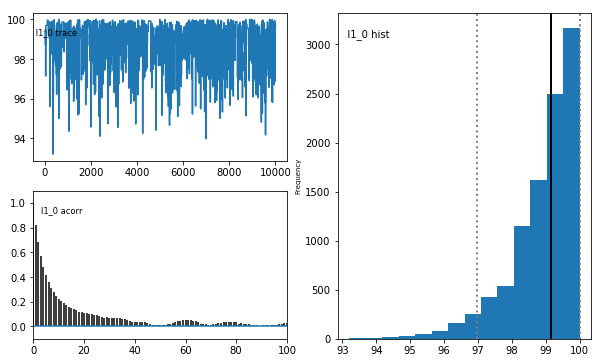

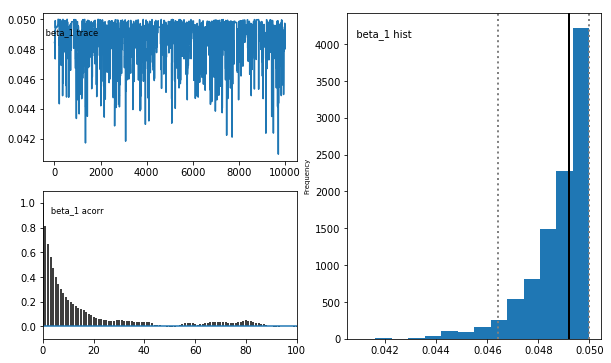

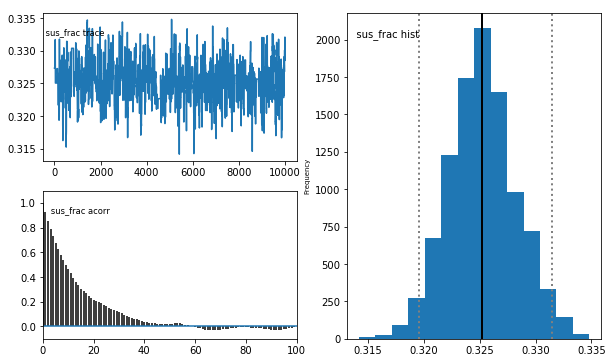

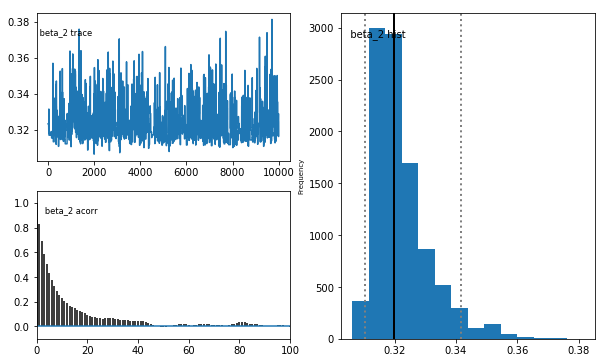

In [103]:
%matplotlib inline
plot(mc)

In [104]:
m_deaths = np.array(mortality_sim.stats()['mean'])
d_deaths = np.array(mortality_data)
# print m_deaths
# print d_deaths
rmsq = np.sqrt(np.mean(( m_deaths - d_deaths)**2))
print rmsq

15.564731349934167


#### Plot the fit

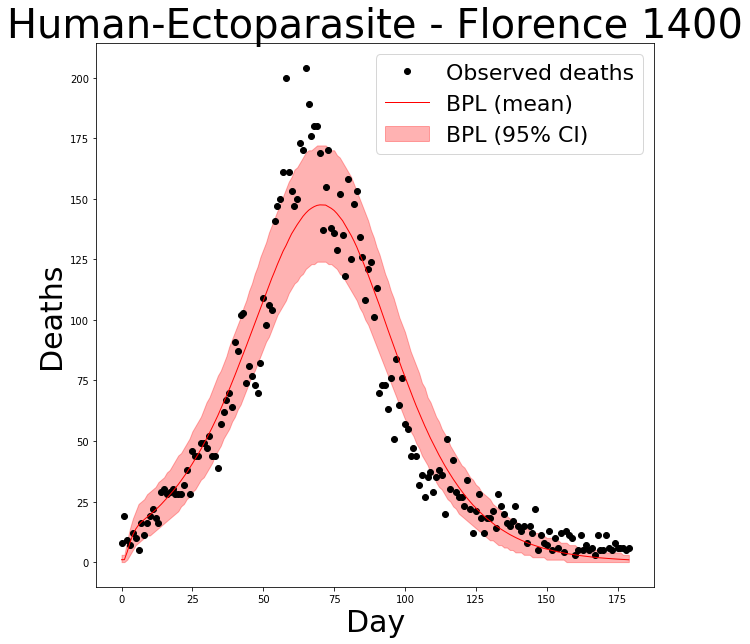

In [105]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.title('Human-Ectoparasite - Florence 1400', fontsize=40)
plt.xlabel('Day', fontsize=30)
plt.ylabel('Deaths', fontsize=30)
plt.plot(mortality_data, 'o', mec='black', color='black', label='Observed deaths')
plt.plot(mortality_sim.stats()['mean'], color='red', linewidth=1, label='BPL (mean)')
y_min = mortality_sim.stats()['quantiles'][2.5]
y_max = mortality_sim.stats()['quantiles'][97.5]
plt.fill_between(range(0,len(mortality_data)), y_min, y_max, color='r', alpha=0.3, label='BPL (95% CI)')
plt.legend(prop={"size":22})
# plt.savefig('barcelona_1490_bpl.png')